In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Thermobar as pt

In [2]:
#Here let's recalculate T-P from the study of Tappe et al. (2021).
#First creating the composition arrays.
out=pt.import_excel('Tappe2021.xlsx', sheet_name="Sheet1")
myOpxs = out['Opxs']
myCpxs = out['Cpxs']
myGts = out['Gts']
#Iterative solution of Brey and Köhler (1990) for the given dataset.
calc=pt.calculate_pyroxenes_garnet_press_temp(opx_comps=myOpxs, cpx_comps=myCpxs,
                                              gt_comps = myGts, equationP="P_Brey1990",
                                              equationT="T_Brey1990",T_K_guess = 1300)
calc


/home/sinan/.local/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
/home/sinan/.local/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,P_kbar_calc,T_K_calc
0,62.186165,1665.508418
1,59.185112,1638.988377
2,60.174362,1663.121565
3,61.142703,1644.163358
4,62.367269,1680.010277
5,60.658036,1653.928696
6,60.041928,1648.787123
7,62.232799,1654.135943
8,65.247289,1667.306600
9,57.612930,1653.004617


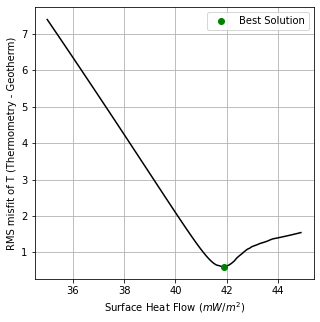

In [4]:
T_ext = calc['T_K_calc']
P_ext = calc['P_kbar_calc'] / 10.0

#Solving for SHF values between 35 (SHF_start) and 45 (SHF_end) for the function with increments of 0.1 (SHF increment)
#to minimise the RMS misfit function find the best fitting geotherm. 
#Adiabat=True adds adiabat to the end of the conductive geotherm.
#Kinked=True adds kinked geotherm at the temperature BDL_T, parallel to the D-G transition.
#max_depth=maximum depth until the geotherm is calculated.
#plot_solution=True returns a graph of minimisation process.
shf_solution, T_solution, depth_solution, p_solution, misfit_solution = pt.invert_generalised_mantle_geotherm(P_sample = P_ext, T_sample = T_ext, std_P = 0.3, std_T = 50,
 SHF_start = 35, SHF_end=45, SHF_increment=0.1, max_depth=300, kinked=False, BDL_T = 170, adiabat = True,
 plot_solution = True)

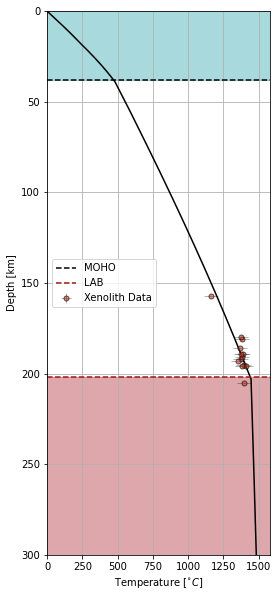

In [5]:
#Making a plot of the solution.
pt.mantle_geotherm_plot(T = T_solution, P = p_solution, Depth = depth_solution, 
                        plot_style = 'Depth', Temp_unit = 'Celsius', 
                        T_Sample = T_ext, P_Sample = P_ext, T_std = 50, 
                        P_std = 0.3, plot_type = 'show', max_depth = 250, 
                        moho = 38, lab = 202, leg = True)

In [ ]:
help(pt.mantle_geotherm_plot)